In [82]:
#import Pkg
#Pkg.add("Lathe")

In [83]:
using DataFrames, CSV
#df = CSV.read("ISM_vs_GDP_003.csv")
df = CSV.read("ISM_SP500.csv")

┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `using DataFrames; CSV.read(input, DataFrame; kw...)
│   caller = read(::String) at CSV.jl:40
└ @ CSV /Users/uki/.julia/packages/CSV/MKemC/src/CSV.jl:40


,observation_date,S&P500,S&P500 y/y %,S&P500 m/m %,ISM Manufacturing
,String,Float64,Float64?,Float64?,Float64
1,1-Jan-1957,44.72,missing,missing,53.6
2,1-Feb-1957,43.26,missing,-0.0326,51.0
3,1-Mar-1957,44.11,missing,0.0196,47.5
4,1-Apr-1957,45.74,missing,0.037,43.1
5,1-May-1957,47.43,missing,0.0369,43.4
6,1-Jun-1957,47.37,missing,-0.0013,45.9
7,1-Jul-1957,47.91,missing,0.0114,45.7
8,1-Aug-1957,45.22,missing,-0.0561,45.3
9,1-Sep-1957,42.42,missing,-0.0619,45.8


In [84]:
#rename!(df, :x1 => :Day)
#rename!(df, :x2 => :Date)
#rename!(df, :x3 => :IMS)
#rename!(df, :x4 => :GDP)

In [89]:
date     = df[:,1]
SP500    = df[:,2]
SP500yy  = df[:,3]
SP500mm  = df[:,4]
ismm     = df[:,5]

758-element Array{Float64,1}:
 53.6
 51.0
 47.5
 43.1
 43.4
 45.9
 45.7
 45.3
 45.8
 41.1
 40.4
 36.8
 33.4
  ⋮
 54.6
 53.4
 52.3
 51.6
 51.3
 48.8
 48.2
 48.5
 48.1
 47.8
 50.9
 50.1

In [77]:
using DataFrames



function normalize(input_array::Array{Float64,1})
    items = length(gpd_original)
    normalized = zeros(Float64, items, 1) # type, rows, columns
    
    min = minimum(input_array)
    max = maximum(input_array)   

    for i in 1:items
        value = (input_array[i] - min) / (max - min)
        normalized[i] = value
    end
    
    return normalized
end

gdp_normalized = normalize(gpd_original)
ims_normalized = normalize(ims_original)

864×1 Array{Float64,2}:
 0.4636174636174637
 0.4324324324324325
 0.28898128898128894
 0.3326403326403326
 0.4178794178794179
 0.49064449064449067
 0.395010395010395
 0.3264033264033265
 0.2640332640332641
 0.37006237006237014
 0.2702702702702703
 0.11642411642411644
 0.07276507276507277
 ⋮
 0.5654885654885655
 0.5155925155925156
 0.5384615384615384
 0.48648648648648646
 0.47193347193347196
 0.4636174636174637
 0.4532224532224533
 0.4033264033264033
 0.39085239085239093
 0.3970893970893971
 0.3887733887733888
 0.3825363825363825

- https://docs.juliaplots.org/latest/layouts/

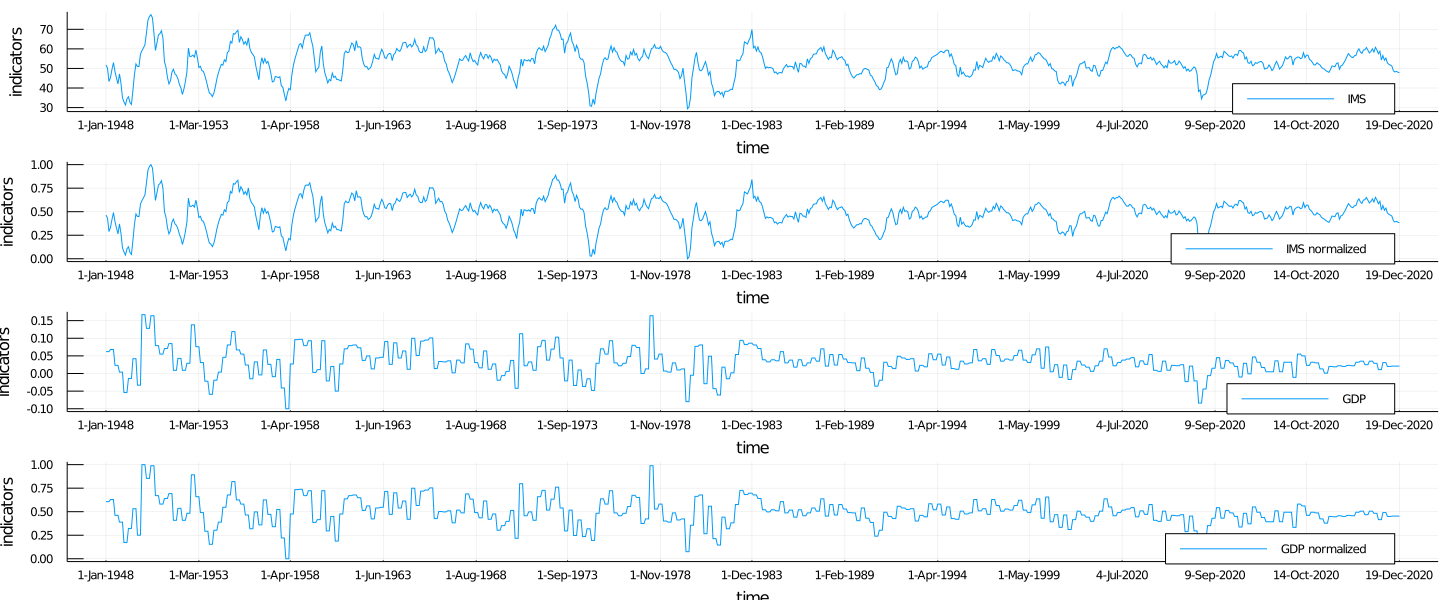

In [81]:
using Plots
gr()
plot(df[:,2], 
    [ims_original ims_normalized gpd_original gdp_normalized  ], 
    label    = ["IMS" "IMS normalized"  "GDP" "GDP normalized"],
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1450, 600), # width, height
    layout = (4, 1)
    )

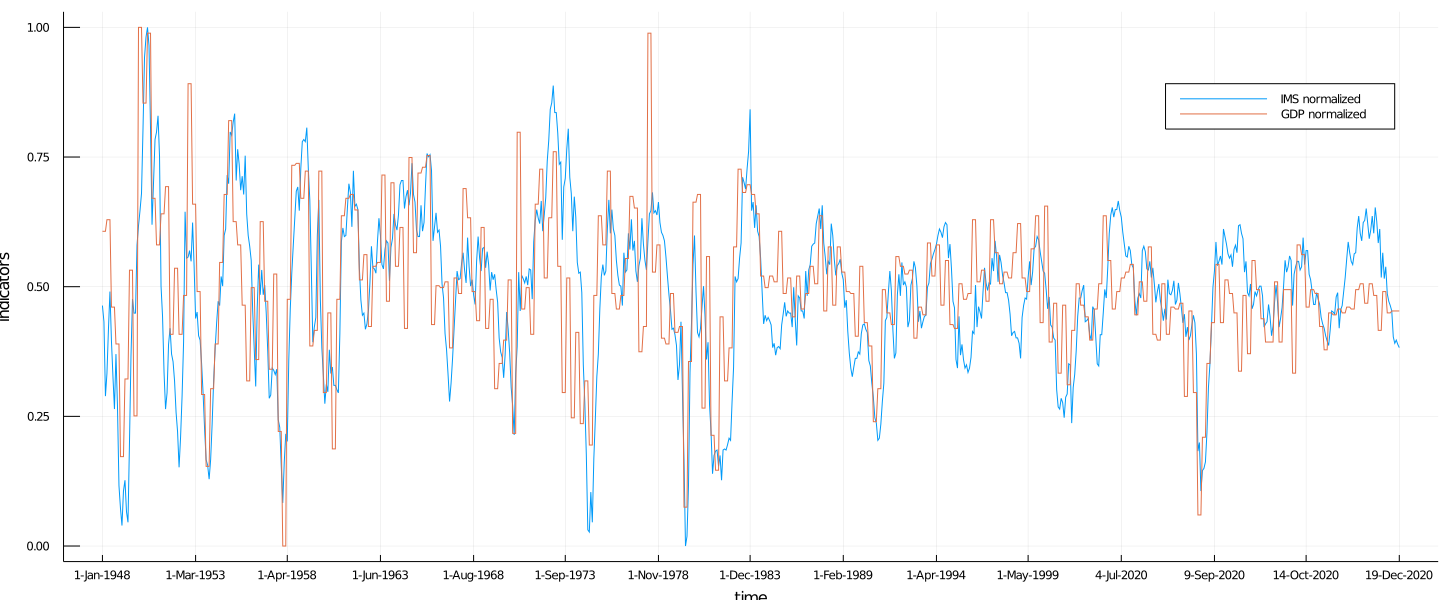

In [79]:
using Plots
gr()
plot(df[:,2], 
    [ ims_normalized  gdp_normalized  ], 
    label    = [  "IMS normalized" "GDP normalized"],
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1450, 600), # width, height
    #, layout = (2, 1)
    )